In [2]:
import pandas as pd

# Loading in DataFrame from Files

In [3]:
coffee = pd.read_csv('./warmup-data/coffee.csv')
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


In [61]:
results = pd.read_parquet('./data/results.parquet')
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,None
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,None


In [25]:
olympics_data = pd.read_excel('./data/olympics-data.xlsx')
olympics_data.head()

bios = pd.read_csv('./data/bios.csv')

# Accessing Data with Pandas

## head, tails and sample

In [64]:
coffee.head(10)
coffee.tail(4)
coffee.sample(10, random_state=1) # => data gets print in random

,Day,Coffee Type,Units Sold
3,Tuesday,Latte,20
7,Thursday,Latte,30
6,Thursday,Espresso,40
2,Tuesday,Espresso,30
10,Saturday,Espresso,45
4,Wednesday,Espresso,35
1,Monday,Latte,15
12,Sunday,Espresso,45
0,Monday,Espresso,25
13,Sunday,Latte,35


## loc and iloc

In [29]:
# LOC : allows us to filter by rows and columns with both index and values
# Syntax:  coffee.loc[Row,Column]
# coffee.loc[0]
# coffee.loc[[0,1,3]]
# coffee.loc["Monday":"Wednesday"]
# coffee.loc[2: , ["Day","Units Sold"]]
# coffee.loc[1, "Units Sold"] = 10 # update data 
coffee.head()


,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


In [5]:
#ILOC : use index locations vales not supported
coffee.iloc[2:, [0,2]]

,Day,Units Sold
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35
10,Saturday,45
11,Saturday,35


In [14]:
# at -> get specific values
coffee.at[0, "Units Sold"]

np.int64(25)

In [18]:
coffee["Units Sold"]
coffee.Day

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

In [22]:
# sort
coffee.sort_values("Units Sold", ascending= False)
coffee.sort_values(["Units Sold","Coffee Type"], ascending= False)



,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
4,Wednesday,Espresso,35
7,Thursday,Latte,30
2,Tuesday,Espresso,30


In [25]:
# Iteraltion
for index, row in coffee.iterrows():
    print(index)
    print(row) # we can also specify row like : print(row["Unit Sold"]) 
    print("\n\n\n\n")

0
25





1
10





2
30





3
20





4
35





5
25





6
40





7
30





8
45





9
35





10
45





11
35





12
45





13
35







# Filtering Data

In [17]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [18]:
bios.tail()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18
145499,149814,Bill Phillips,1913-07-15,Dulwich Hill,New South Wales,AUS,Australia,NaN,NaN,2003-10-20


In [19]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [43]:
# bios.loc[bios["height_cm"] > 215] # or -> bios.loc[bios["height_cm"] > 215, ["name", "height_cm"]]
bios[bios["height_cm"] > 215]# or -> bios[bios["height_cm"] > 215][["name", "height_cm"]]

# multiple conditions
bios[(bios["height_cm"] > 215) & (bios["born_country"] == "FRA")]

# filter with contains
bios[bios["name"].str.contains("Keith", case = False)]
bios[bios["name"].str.contains("Keith|patrick", case = False)]

# with in
bios[bios["born_country"].isin(["USA","FRA"])] # also can give multiple with &


,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
5,6,Nicolas Chatelain,1970-01-13,Amiens,Somme,FRA,France,181.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...
145454,149180,Anna Hoffmann,2000-03-28,Madison,Wisconsin,USA,United States,NaN,NaN,NaN
145457,149183,Alix Wilkinson,2000-08-02,Mammoth Lakes,California,USA,United States,NaN,NaN,NaN
145467,149194,Elisa Nakab,1998-05-08,Briançon,Hautes-Alpes,FRA,Italy,NaN,NaN,NaN
145468,149195,Justin Abdelkader,1987-02-25,Muskegon,Michigan,USA,United States,187.0,97.0,NaN


In [47]:
# filter with query
bios.query('born_country == "USA" or name == "deepak"') # more easier

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
54,55,Monique Javer,1967-07-22,Burlingame,California,USA,Great Britain,177.0,64.0,NaN
960,964,Xóchitl Escobedo,1968-09-17,West Covina,California,USA,Mexico,170.0,60.0,NaN
961,965,Angélica Gavaldón,1973-10-03,El Centro,California,USA,Mexico,160.0,54.0,NaN
1231,1238,Bert Schneider,1897-07-01,Cleveland,Ohio,USA,Canada,NaN,NaN,1986-02-20
1345,1352,Laura Berg,1975-01-06,Santa Fe Springs,California,USA,United States,168.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...
145445,149168,Kristen Santos,1994-11-02,Fairfield,Connecticut,USA,United States,NaN,NaN,NaN
145446,149169,Corinne Stoddard,2001-08-15,Seattle,Washington,USA,United States,NaN,NaN,NaN
145454,149180,Anna Hoffmann,2000-03-28,Madison,Wisconsin,USA,United States,NaN,NaN,NaN
145457,149183,Alix Wilkinson,2000-08-02,Mammoth Lakes,California,USA,United States,NaN,NaN,NaN


# Adding / Removing Columns

In [79]:
# Adding column
# coffee['price'] = 4.99
# coffee


import numpy as np
coffee['new_price'] = np.where(coffee['Coffee Type'] == 'Espresso', 3.99, 5.99)
coffee

,Day,Coffee Type,Units Sold,new_price
0,Monday,Espresso,25,3.99
1,Monday,Latte,15,5.99
2,Tuesday,Espresso,30,3.99
3,Tuesday,Latte,20,5.99
4,Wednesday,Espresso,35,3.99
5,Wednesday,Latte,25,5.99
6,Thursday,Espresso,40,3.99
7,Thursday,Latte,30,5.99
8,Friday,Espresso,45,3.99
9,Friday,Latte,35,5.99


In [81]:
# Drop: returns a updated/ deleted dataframe
coffee.drop(0)
# coffee.drop(columns=['price'], inplace=True)


,Day,Coffee Type,Units Sold
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35
10,Saturday,Espresso,45


In [5]:
coffee_new = coffee.copy()
coffee_new["price"] = 19.99

coffee
coffee_new

,Day,Coffee Type,Units Sold,price
0,Monday,Espresso,25,19.99
1,Monday,Latte,15,19.99
2,Tuesday,Espresso,30,19.99
3,Tuesday,Latte,20,19.99
4,Wednesday,Espresso,35,19.99
5,Wednesday,Latte,25,19.99
6,Thursday,Espresso,40,19.99
7,Thursday,Latte,30,19.99
8,Friday,Espresso,45,19.99
9,Friday,Latte,35,19.99


In [18]:
# Calculating Revenue
coffee_new['revenue'] = coffee_new['Units Sold'] * coffee_new['price']
coffee_new

,Day,Coffee Type,Units Sold,price,revenue
0,Monday,Espresso,25,19.99,499.75
1,Monday,Latte,15,19.99,299.85
2,Tuesday,Espresso,30,19.99,599.70
3,Tuesday,Latte,20,19.99,399.80
4,Wednesday,Espresso,35,19.99,699.65
5,Wednesday,Latte,25,19.99,499.75
6,Thursday,Espresso,40,19.99,799.60
7,Thursday,Latte,30,19.99,599.70
8,Friday,Espresso,45,19.99,899.55
9,Friday,Latte,35,19.99,699.65


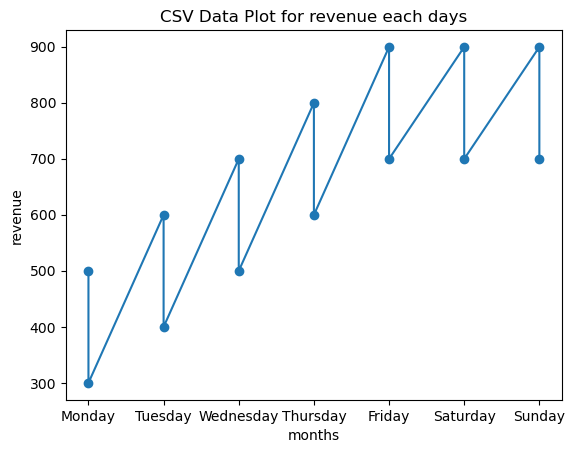

In [17]:
import matplotlib.pyplot as plt

# Plot
plt.plot(coffee_new["Day"], coffee_new["revenue"], marker="o")
# Labels
plt.xlabel("months")
plt.ylabel("revenue")
plt.title("CSV Data Plot for revenue each days")

plt.show()

In [ ]:
coffee["price"] = 1000
coffee

# Rename column:

In [62]:
coffee.rename(columns = {'price':'new_price'})

,Day,Coffee Type,Units Sold,new_price
0,Monday,Espresso,25,1000
1,Monday,Latte,15,1000
2,Tuesday,Espresso,30,1000
3,Tuesday,Latte,20,1000
4,Wednesday,Espresso,35,1000
5,Wednesday,Latte,25,1000
6,Thursday,Espresso,40,1000
7,Thursday,Latte,30,1000
8,Friday,Espresso,45,1000
9,Friday,Latte,35,1000


In [48]:
bios_new = bios.copy()
bios_new['first_name'] = bios_new['name'].str.split(' ').str[0]
bios_new.query('first_name == "Jean"') # query specific names 

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean
682,685,Jean Washer,1894-08-22,Berchem,Antwerpen,BEL,Belgium,NaN,NaN,1972-03-23,Jean
1301,1308,Jean Bassomben,1943-04-11,NaN,NaN,NaN,Cameroon,182.0,86.0,NaN,Jean
2998,3010,Jean Ces,1906-09-05,Béziers,Hérault,FRA,France,NaN,NaN,1969-12-25,Jean
3010,3022,Jean Despeaux,1915-10-22,Paris Xe,Paris,FRA,France,NaN,NaN,1989-05-25,Jean
...,...,...,...,...,...,...,...,...,...,...,...
137390,140744,Jean van der Westhuyzen,1998-12-09,Cape Town,Western Cape,RSA,Australia,184.0,NaN,NaN,Jean
138838,142265,Jean Carlos Caicedo,1995-01-10,Montecristi,Manabí,ECU,Ecuador,NaN,NaN,NaN,Jean
139464,142937,Jean Patry,1996-12-27,Montpellier,Hérault,FRA,France,NaN,NaN,NaN,Jean
139859,143349,Jean Paul Bredau,1999-06-27,Potsdam,Brandenburg,GER,Germany,190.0,82.0,NaN,Jean


In [88]:
# bios_new.info()
bios_new['born_datetime'] = pd.to_datetime(bios_new["born_date"], format = "%Y %M % D")
bios_new['born_year'] = bios_new['born_datetime'].dt.year
bios_new[['name','born_year']]

,name,born_year
0,Jean-François Blanchy,1886.0
1,Arnaud Boetsch,1969.0
2,Jean Borotra,1898.0
3,Jacques Brugnon,1895.0
4,Albert Canet,1878.0
...,...,...
145495,Polina Luchnikova,2002.0
145496,Valeriya Merkusheva,1999.0
145497,Yuliya Smirnova,1998.0
145498,André Foussard,1899.0
